<a href="https://colab.research.google.com/github/satyam-jyoti-sankar/COVID-19-DETECTION-AND-PREDICTION/blob/main/Covid_detection_using_chest_X_Ray(using_ResNet_50)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to ignore the warnings 
#import warnings
#warnings.filterwarnings("ignore")

In [ ]:
# use this link to get the data from drop box

#!wget https://www.dropbox.com/s/e1r2laj50nh4tez/COVID-19_Radiography_Dataset.zip?dl=0

In [ ]:
# add the path where you have saved the data set i.e the zip file

#!unzip "/content/COVID-19_Radiography_Dataset.zip?dl=0"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt 

## Going Through Meta Data

In [ ]:
#covid_imgs = pd.read_excel("COVID-19_Radiography_Dataset_2/COVID.metadata.xlsx")
#covid_imgs.head(2)

In [ ]:
#opacity_images = pd.read_excel("./COVID-19_Radiography_Dataset_2/Lung_Opacity.metadata.xlsx")
#opacity_images.head(2)

In [ ]:
#normal_images = pd.read_excel("./COVID-19_Radiography_Dataset_2/Normal.metadata.xlsx")
#normal_images.head(2)

In [ ]:
#pneumonia_images = pd.read_excel("./COVID-19_Radiography_Dataset_2/Viral Pneumonia.metadata.xlsx")
#pneumonia_images.head(2)

## Working with images 

In [ ]:
#ROOT_DIR = "COVID-19_Radiography_Dataset_2"
#imgs = ['COVID','Lung_Opacity','Normal','Viral Pneumonia']

#NEW_DIR = "all_images/"

In [ ]:
# Copy all my images to a new folder i.e all_images

# if not os.path.exists(NEW_DIR):
#   os.mkdir(NEW_DIR)

#   for i in imgs:
#     org_dir = os.path.join(ROOT_DIR, i+"/")
    
#     for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
#       shutil.copy(imgfile, NEW_DIR)
      
# else:
#   print("Already Exist")




```
# Now lets visualize the number of Images in each categories
```



In [ ]:
# ''' counter = {'COVID':0,'Lung_Opacity':0,'Normal':0,'Viral Pneumonia':0}

# for image in imgs:
#   for count in glob.iglob(NEW_DIR+image+"*"):
#     counter[image] += 1

# # the number of images i have in each class
# counter'''

In [ ]:
# '''#visualizing the number of images 

# plt.figure(figsize=(10,5))
# plt.bar(x = counter.keys(), height= counter.values())
# plt.show()'''



```
# First off we need to give equal amout of data for every class. 
# we will be Deviding our data between Train, Test, Validation

Train Data: 
        Normal : 3500
        Lung Opacity : 3500 
        Covid+ Pneumonia : 3000 + 500

Validation Data:
        Normal : 1000
        Lung Opacity : 1000
        Covid + Pneumonia : 500 +500

Test Data:
        Normal : 1000
        Lung Opacity : 1000
        Covid + Pneumonia : 100 +500
```



In [ ]:
'''if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")


  # Train Data
  for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

#   for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
#     shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
#     os.remove(i)

  # Validation Data
  for i in np.random.choice(replace= False , size= 308 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

#   for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
#     shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
#     os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

#   for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
#     shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
#     os.remove(i)'''

 



'if not os.path.exists(NEW_DIR+"train_test_split/"):\n\n  os.makedirs(NEW_DIR+"train_test_split/")\n\n  os.makedirs(NEW_DIR+"train_test_split/train/Normal")\n  os.makedirs(NEW_DIR+"train_test_split/train/Covid")\n\n  os.makedirs(NEW_DIR+"train_test_split/test/Normal")\n  os.makedirs(NEW_DIR+"train_test_split/test/Covid")\n\n  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")\n  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")\n\n\n  # Train Data\n  for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):\n    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )\n    os.remove(i)\n\n  for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):\n    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )\n    os.remove(i)\n\n#   for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):\n#     shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )\n#     os.rem

In [ ]:
train_path  = "/content/drive/MyDrive/ final/ train"
valid_path  = "/content/drive/MyDrive/ final/validation"
test_path   = "/content/drive/MyDrive/ final/test"

In [ ]:
import tensorflow
from tensorflow import keras
# # import Pillow
#import image
import pandas as pd
import os
import shutil
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

# # kanha use below code 
from tensorflow.keras import Sequential
# # from keras.models import Sequentials

from tensorflow.keras.preprocessing import image

#kanha edit below code 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# # from keras.preprocessing import ImageDataGenerator

import numpy as np
from glob import glob
#import matplotlib as mpl
#from PIL import Image
#matplotlib.__version__
#import matplotlib.pyplot as plt
# .pyplot as yyyt
print('Jay jagarnath')

Jay jagarnath


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    
                                    )

train = train_data_gen.flow_from_directory(directory= train_path, 
                                           target_size=(224,224))

Found 8034 images belonging to 2 classes.


In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= valid_path, 
                                                target_size=(224,224))

Found 1068 images belonging to 2 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 860 images belonging to 2 classes.


In [ ]:
# Covid +ve X-Ray is represented by 0 and Normal is represented by 1

class_type = {0:'Covid',  1 : 'Normal'}

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train.next()

In [ ]:
# function when called will prot the images 

def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


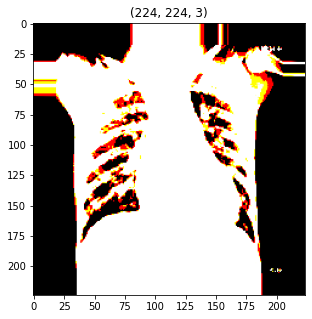

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


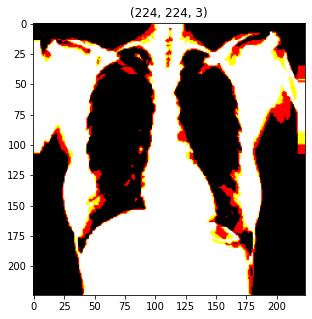

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


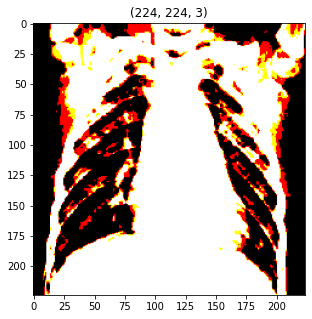

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


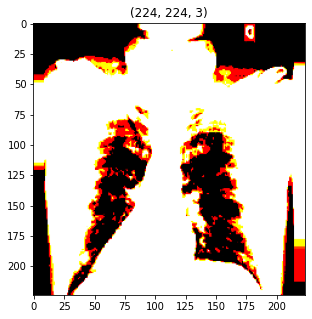

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


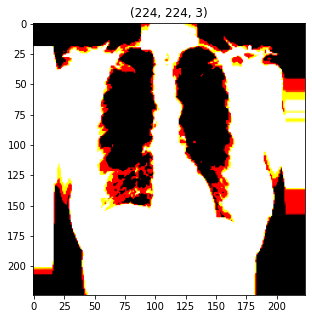

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


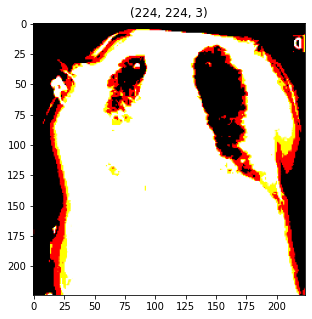

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


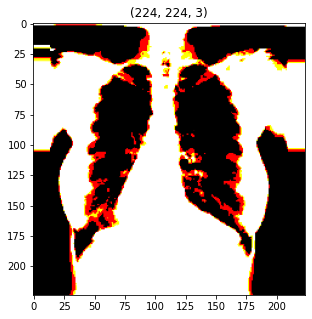

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


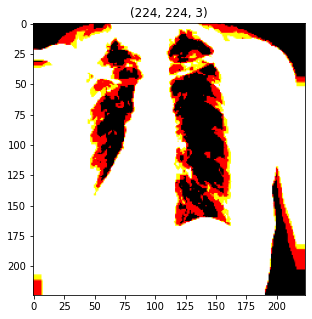

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


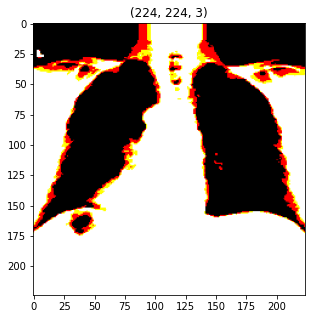

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


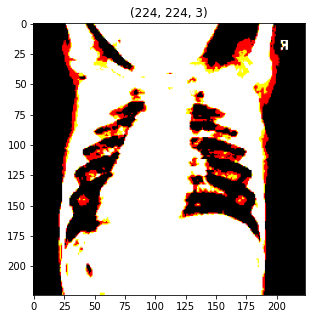

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


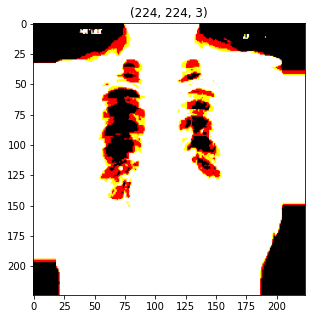

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


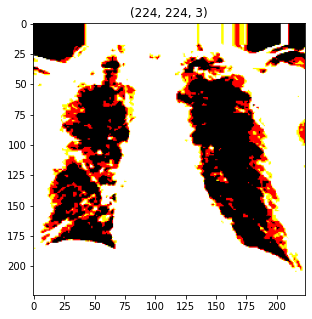

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


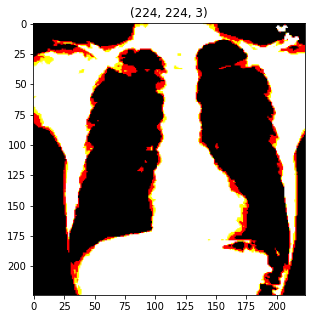

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


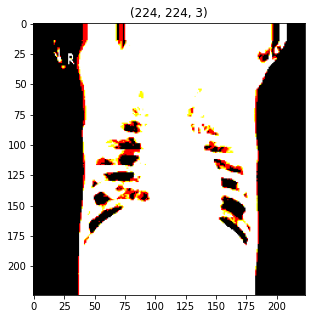

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


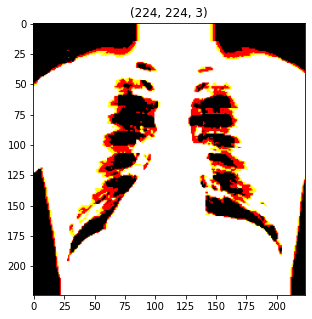

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


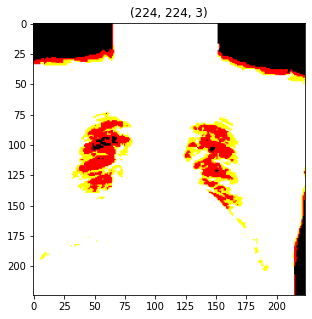

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


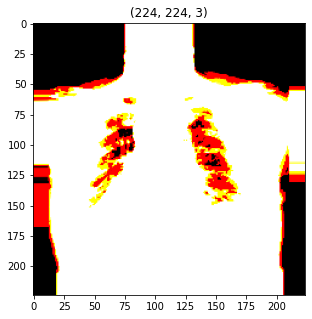

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


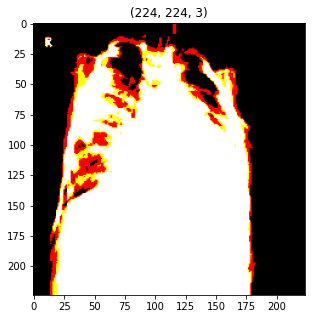

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


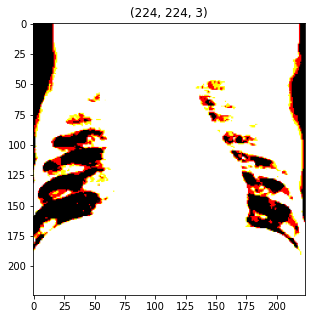

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


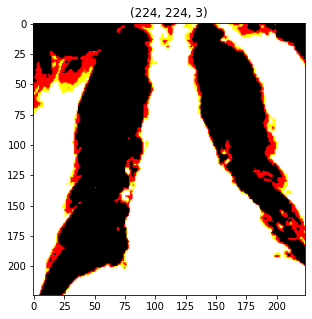

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


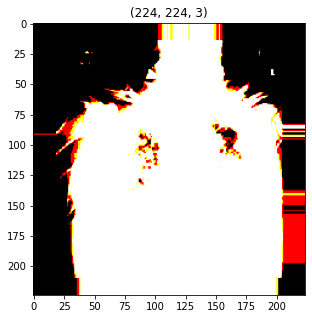

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


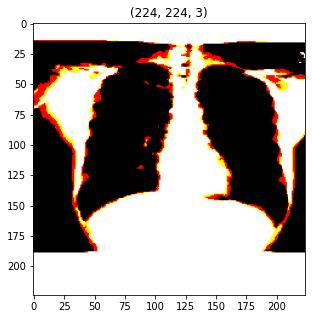

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


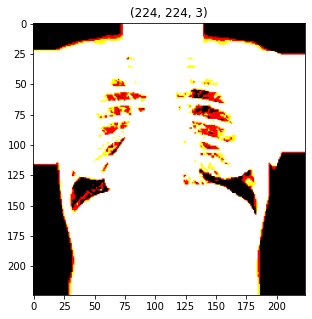

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


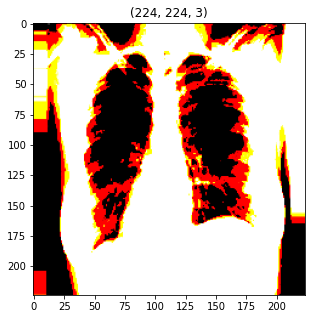

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


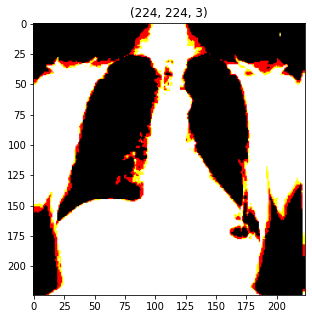

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


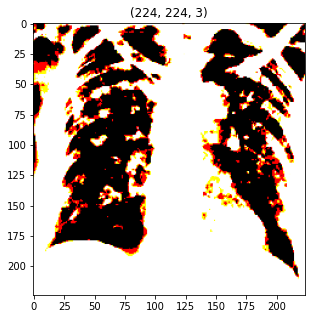

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


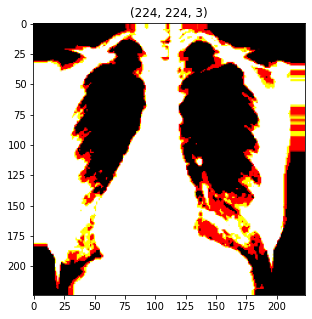

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


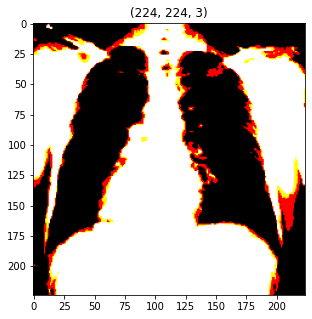

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


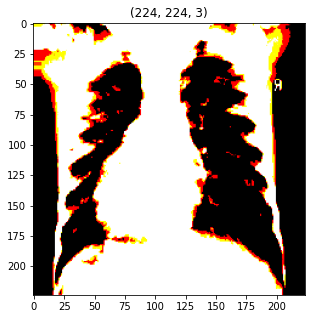

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


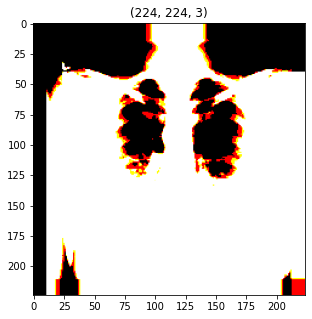

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


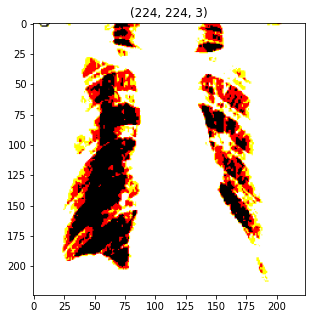

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


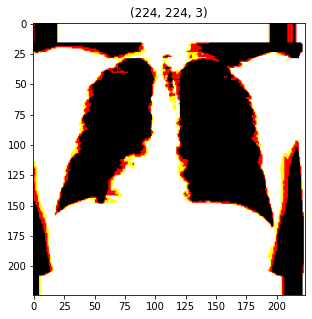

In [ ]:
# function call to plot the images 

plotImages(t_img, label)

In [ ]:
##we will be using our model Resnet 50

# The mode that we are using here is ResNet50
The ResNet-50 model consists of 5 stages each with a convolution and Identity block. Each convolution block has 3 convolution layers and each identity block also has 3 convolution layers. The ResNet-50 has over 23 million trainable parameters

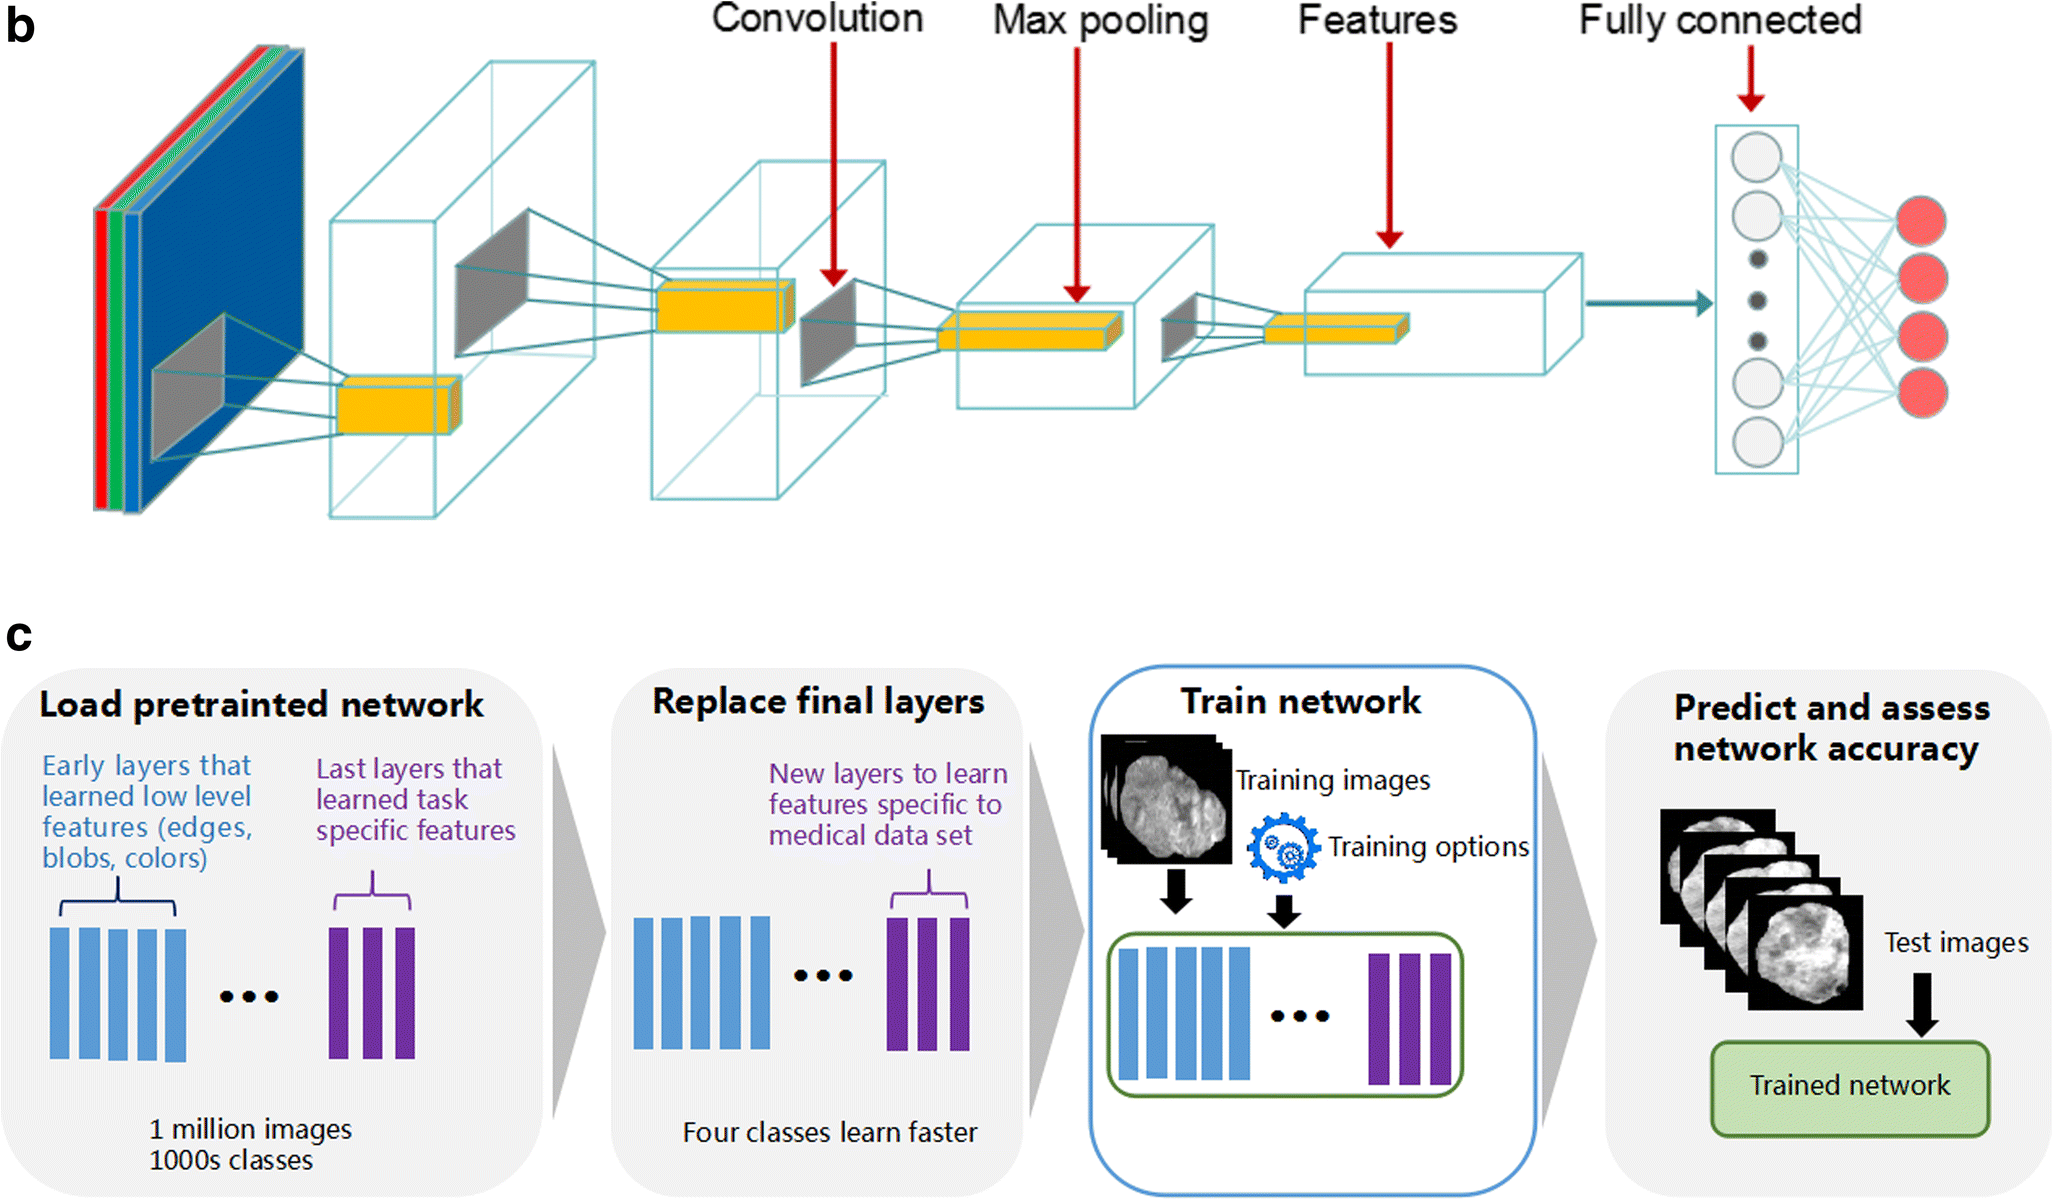

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [ ]:
res = ResNet50( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in res.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [ ]:
x = Flatten()(res.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

# creating our model.
model = Model(res.input, x)

In [ ]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# implementing early stopping and model check point 

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [ ]:
hist = model.fit(train, steps_per_epoch= 10,
                           epochs= 10, 
                           validation_data= valid ,
                           validation_steps= 5, 
                           callbacks=[es,mc])

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 9.4861 - accuracy: 0.6000 
Epoch 1: val_accuracy improved from -inf to 0.85000, saving model to bestmodel.h5
10/10 [==============================] - 180s 17s/step - loss: 9.4861 - accuracy: 0.6000 - val_loss: 1.8162 - val_accuracy: 0.8500
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 3.9049 - accuracy: 0.8438
Epoch 2: val_accuracy did not improve from 0.85000
10/10 [==============================] - 107s 12s/step - loss: 3.9049 - accuracy: 0.8438 - val_loss: 4.7882 - val_accuracy: 0.7688
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 3.1268 - accuracy: 0.8438
Epoch 3: val_accuracy improved from 0.85000 to 0.90000, saving model to bestmodel.h5
10/10 [==============================] - 101s 11s/step - loss: 3.1268 - accuracy: 0.8438 - val_loss: 1.5692 - val_accuracy: 0.9000
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 2.0041 - accuracy: 0.8438
Epoch 4: val

In [ ]:
# load only the best model 
from tensorflow.keras.models import load_model
model = load_model("bestmodel.h5")

# Seeing how our model has performed

In [ ]:
h = hist.history
#h.keys()

In [ ]:
# checking out the accurscy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy of your model is = 0.8709302544593811 %


In [ ]:
from tensorflow.keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

The given X-Ray image is of type = Covid

The chances of image being Covid is : 99.99998807907104 percent

The chances of image being Normal is : 5.380518786068933e-06 percent


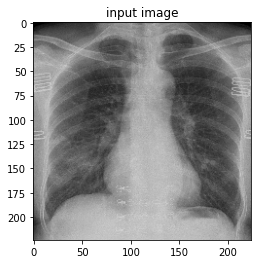

In [ ]:
# path for that new image. ( you can take it either from google or any other scource)

path = "/content/drive/MyDrive/covid2.jpeg"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
x=model.predict(img)[0][0]*100
y=model.predict(img)[0][1]*100

if(x==100 or y ==100):
    print('Plz input a Correct x -ray image')
   
else:
    print(f"The given X-Ray image is of type = {res}")
    print()
    print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
    print()
    print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")


# to display the image  
    plt.imshow(img[0]/255, cmap = "gray")
    plt.title("input image")
    plt.show()
    
    
    
  